In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [26]:
df = pd.read_csv("creditcard.csv")

In [27]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
pd.options.display.max_columns = None

In [29]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [31]:
df.shape

(284807, 31)

In [32]:
print("Number of columns:{}".format(df.shape[1]))
print("Number of rows:{}".format(df.shape[0]))

Number of columns:31
Number of rows:284807


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [37]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [38]:
df = df.drop(['Time'], axis =1)

In [39]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [40]:
df.duplicated().any()

True

In [41]:
df = df.drop_duplicates()

In [42]:
df.shape

(275663, 30)

In [43]:
df['Class'].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<class 'pandas.core.frame.DataFrame'>
Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     275663 

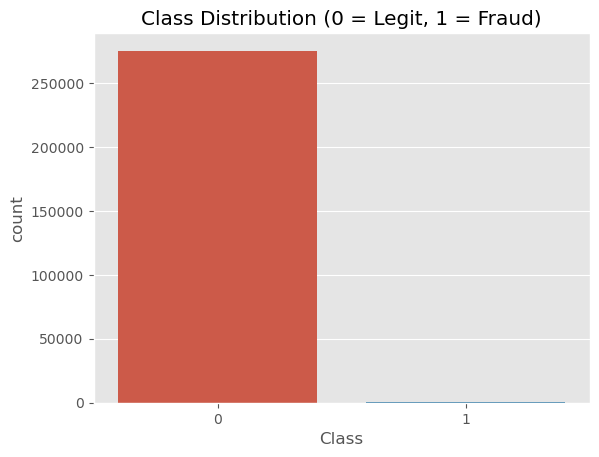

In [45]:
print(df.info())
print(df["Class"].value_counts())

# Visualize class imbalance
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

In [47]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [52]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [53]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

[LightGBM] [Info] Number of positive: 382, number of negative: 220148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 220530, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001732 -> initscore=-6.356635
[LightGBM] [Info] Start training from score -6.356635


In [54]:
# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, lgbm_pred, "LightGBM")

--- XGBoost ---
[[55038     4]
 [   21    70]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.95      0.77      0.85        91

    accuracy                           1.00     55133
   macro avg       0.97      0.88      0.92     55133
weighted avg       1.00      1.00      1.00     55133

ROC-AUC Score: 0.884579048726427
--- LightGBM ---
[[54811   231]
 [   55    36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55042
           1       0.13      0.40      0.20        91

    accuracy                           0.99     55133
   macro avg       0.57      0.70      0.60     55133
weighted avg       1.00      0.99      1.00     55133

ROC-AUC Score: 0.6957038002149009


In [55]:
classifier = {
    "Logistic Regression" :LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier()
}
for name, clf in classifier.items():
    
    print(f"\n======={name}=======")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test,y_pred)}")
    print(f"\n Precision: {precision_score(y_test,y_pred)}")
    print(f"\n Recall: {recall_score(y_test,y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test,y_pred)}")


=======Logistic Regression=======

 Accuracy: 0.9992200678359603

 Precision: 0.8870967741935484

 Recall: 0.6043956043956044

 F1 Score: 0.718954248366013

=======Decision Tree Classifier=======

 Accuracy: 0.998911722561805

 Precision: 0.6565656565656566

 Recall: 0.7142857142857143

 F1 Score: 0.6842105263157894


# UnderSampling - Working with the data of minority class

In [56]:
normal = df[df['Class']==0]
fraud = df[df['Class']==1]

In [57]:
normal.shape

(275190, 30)

In [58]:
fraud.shape

(473, 30)

In [59]:
normal_sample =normal.sample(n=473)

In [60]:
normal_sample.shape

(473, 30)

In [61]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [62]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.023725,-0.161140,-0.712013,-0.619648,2.043678,3.797015,-0.259846,0.015305,-0.047668,-0.461124,-0.531732,0.155755,-0.274514,0.251117,-0.187861,-0.041435,-0.377965,-0.171292,0.467673,0.197162,0.651346,-0.923673,-0.334915,1.050883,1.049824,0.410048,0.086095,0.219982,0.280667,0
1,2.011826,-0.321759,-0.407298,0.332603,-0.682876,-0.730067,-0.519055,-0.095147,1.423523,-0.193043,-0.974411,0.282968,-0.031302,0.044303,1.099049,0.209578,-0.710868,0.442137,-0.273436,-0.248585,0.212753,0.814148,0.111161,-0.114331,-0.049738,-0.553815,0.058506,-0.035041,-0.345233,0
2,0.814406,-2.529027,-1.246451,1.073307,-0.934907,0.716662,0.067057,-0.018940,1.866393,-0.637396,-1.854242,0.738280,0.364026,-0.586792,-1.007153,-0.547956,-0.046436,0.129482,0.124267,1.037004,0.576419,0.792940,-0.602583,0.387080,0.093516,-0.040044,-0.063664,0.062295,2.113470,0
3,1.258704,0.014441,-0.862492,0.062620,1.994463,3.529851,-0.646203,0.885365,-0.003479,0.087574,-0.155429,0.058712,0.063873,0.355610,1.281886,0.690805,-1.052471,0.345733,-0.098737,0.000051,-0.128565,-0.514537,-0.006404,0.974670,0.571209,-0.463937,0.035684,0.025694,-0.317287,0
4,-1.002145,-0.095983,1.448841,-3.038472,-1.237315,-0.466509,-0.694527,0.617576,-2.242574,0.559247,0.248250,-0.977378,-1.013536,0.045388,-1.222042,0.007756,0.305988,0.657887,-0.604022,-0.418757,-0.107530,-0.025168,-0.312524,-0.042397,0.580061,-0.131866,0.147817,0.031433,-0.329241,0


In [63]:
new_data['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [64]:
X = new_data.drop('Class',axis = 1)
y = new_data['Class']

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [66]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [67]:
classifier = {
    "Logistic Regression" :LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier()
}
for name, clf in classifier.items():
    
    print(f"\n======={name}=======")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test,y_pred)}")
    print(f"\n Precision: {precision_score(y_test,y_pred)}")
    print(f"\n Recall: {recall_score(y_test,y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test,y_pred)}")


=======Logistic Regression=======

 Accuracy: 0.9315789473684211

 Precision: 0.9587628865979382

 Recall: 0.9117647058823529

 F1 Score: 0.9346733668341709

=======Decision Tree Classifier=======

 Accuracy: 0.8894736842105263

 Precision: 0.8785046728971962

 Recall: 0.9215686274509803

 F1 Score: 0.8995215311004785


# OverSampling - Working with the data of majority class

In [68]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [69]:
X.shape

(275663, 29)

In [70]:
y.shape

(275663,)

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [73]:
y_res.value_counts()

Class
0    275190
1    275190
Name: count, dtype: int64

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2 , random_state = 42)

In [75]:
classifier = {
    "Logistic Regression" :LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier()
}
for name, clf in classifier.items():
    
    print(f"\n======={name}=======")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test,y_pred)}")
    print(f"\n Precision: {precision_score(y_test,y_pred)}")
    print(f"\n Recall: {recall_score(y_test,y_pred)}")
    print(f"\n F1 Score: {f1_score(y_test,y_pred)}")


=======Logistic Regression=======

 Accuracy: 0.9441295105200044

 Precision: 0.9730792322739333

 Recall: 0.9134592658582259

 F1 Score: 0.942327169061105

=======Decision Tree Classifier=======

 Accuracy: 0.9982012427777173

 Precision: 0.9974404124385063

 Recall: 0.9989636928894787

 F1 Score: 0.9982014715232991


In [83]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res,y_res)

DecisionTreeClassifier()

In [77]:
import joblib

In [78]:
joblib.dump(dtc,"credit_card_model.pkl")

['credit_card_model.pkl']

In [79]:
model = joblib.load("credit_card_model.pkl")

In [80]:
pred = model.predict([[-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])

C:\Users\Maria Sebastina\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [81]:
pred = model.predict([[	1.10321543528383,-0.0402962145973447,1.2673320885949,1.28909146962552,-0.735997163604068,0.288069162976262,-0.586056786337461,0.189379713679593,0.782332891785191,-0.267975066537173,-0.450311279515466,0.936707714991982,0.708380406186981,-0.468647287707221,0.354574063407955,-0.246634655717582,-0.00921237772707382,-0.595912405700819,-0.57568162226261,-0.113910176982092,-0.0246120063374677,0.196001952806192,0.0138016541409422,0.103758331023198,0.364297540595235,-0.382260574113217,0.092809187460487,0.0370505169810008,12.99]])

C:\Users\Maria Sebastina\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [82]:
pred[0]

0

In [54]:
if pred[0] == 0:
    print("Normal Transaction")
else:
    print("Fraud Transaction")

Normal Transaction


In [2]:
!pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [4]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

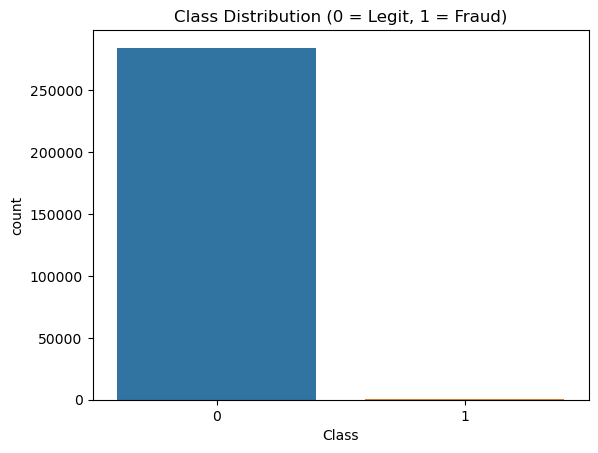

In [5]:
print(data.info())
print(data["Class"].value_counts())

# Visualize class imbalance
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

In [6]:
# Scale 'Amount' feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data = data.drop(columns=['Time'])  # Drop irrelevant feature

In [8]:
X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [14]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace 4 with your desired number of cores

--- XGBoost ---
[[56854    10]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.83      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.9131773770284703
--- LightGBM ---
[[56737   127]
 [   39    59]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.32      0.60      0.42        98

    accuracy                           1.00     56962
   macro avg       0.66      0.80      0.71     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.7999037086697367


In [19]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)